In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

In [40]:
data =  pd.read_csv('all_data_lmxb_cv.csv')
print(data)

      index_compiled  index  class  hea_class  B_M_FLUX_AP  B_B_FLUX_AP_AVG  \
0                  0    481    0.0   0.946746     0.000000     0.000000e+00   
1                  1     52    1.0   0.887574     0.011436     2.273567e-03   
2                  2    873    0.0   0.946746     0.032553     1.203327e-02   
3                  3    456    0.0   0.946746     0.000021     0.000000e+00   
4                  4    622    0.0   0.946746     0.000000     0.000000e+00   
...              ...    ...    ...        ...          ...              ...   
1369            1369    459    0.0   0.946746     0.000006     4.454713e-07   
1370            1370    741    0.0   0.946746     0.000000     0.000000e+00   
1371            1371    781    0.0   0.946746     0.000505     0.000000e+00   
1372            1372     22    1.0   0.887574     0.000098     1.885397e-05   
1373            1373    671    0.0   0.946746     0.000008     1.057301e-06   

      B_B_FLUX_BB_AP  B_B_FLUX_BREMS_AP  B_B_FLUX_B

In [42]:
print(data.shape)
x = data.drop(['index_compiled', 'index', 'class' , 'hea_class'],axis=1)
print(x.shape)
y = data['class']
y.shape

(1374, 118)
(1374, 114)


(1374,)

In [43]:
x_np =  x.to_numpy()
y_np =  y.to_numpy()
x_train = x_np[:1000,:]
y_train = y_np[:1000]
print(x_train.shape)
print(y_train.shape)

(1000, 114)
(1000,)


In [44]:
def split_data(x,y,s):   
    split = s
    split_no = int(split*len(y))
    x_train = x[:split_no, :]
    y_train = y[:split_no]
    x_test = x[split_no:, :]
    y_test = y[split_no:]
    return ((x_train,y_train) , (x_test ,y_test))

(x_train,y_train),(x_test,y_test) = split_data(x_np, y_np, 0.9)
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(1236, 114) (1236,)
(138, 114) (138,)


# Neural Netork starts here

In [45]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [46]:
one_hot_y_train =  to_categorical(y_train)
one_hot_y_test =  to_categorical(y_test)

Epoch 1/40
35/35 [==============================] - 1s 9ms/step - loss: 0.6333 - accuracy: 0.6853 - val_loss: 0.6451 - val_accuracy: 0.6290
Epoch 2/40
35/35 [==============================] - 0s 4ms/step - loss: 0.4280 - accuracy: 0.8058 - val_loss: 0.6461 - val_accuracy: 0.6290
Epoch 3/40
35/35 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8498 - val_loss: 0.6504 - val_accuracy: 0.6290
Epoch 4/40
35/35 [==============================] - 0s 4ms/step - loss: 0.3231 - accuracy: 0.8597 - val_loss: 0.6555 - val_accuracy: 0.6290
Epoch 5/40
35/35 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.8579 - val_loss: 0.6427 - val_accuracy: 0.6290
Epoch 6/40
35/35 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.8930 - val_loss: 0.6203 - val_accuracy: 0.6290
Epoch 7/40
35/35 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.9047 - val_loss: 0.6266 - val_accuracy: 0.6532
Epoch 8/40
35/35 [==

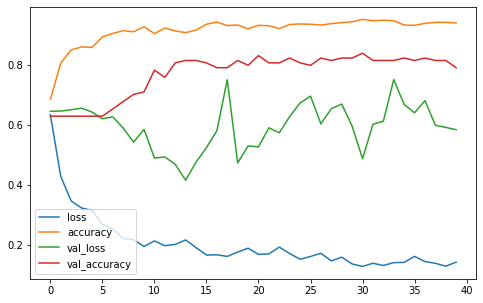

In [47]:
def model_gen(shape):

    inputs =  keras.Input(shape=(114,))
    dense =  layers.Dense(64, activation='relu')
    x = dense(inputs)
    x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    for s in shape:
        x = layers.Dense(64, activation='relu')(x)
    x =  layers.BatchNormalization(axis=-1)(x)
    outputs = layers.Dense(2 , activation='sigmoid')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([64,64,32,8])
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=40, validation_split=0.1)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [12]:
def acc_score(model , y_test , x_test):
    y_pred = model.predict(x_test)
    y_pred = [np.argmax(r) for r in y_pred]
    #y_pred = [np.argmax(r) for r in y_pred]
    correct = 0
    total =  len(y_test)
    for y1,y2 in zip(y_pred,y_test):
        if(int(y1)==int(y2)):
            correct+=1
        else:
            continue
    print('correct prediction :' , correct)
    print('total prediction :' , total)
    print('score: ' , correct/total*100)
    
print('training data prediction')
acc_score(model, y_train, x_train)
print('----------------------------------')
print('test data prediciton')
acc_score(model, y_test, x_test)

training data prediction
correct prediction : 917
total prediction : 961
score:  95.42143600416233
----------------------------------
test data prediciton
correct prediction : 345
total prediction : 413
score:  83.53510895883777


In [10]:
res = model.predict(x_test)
res = [np.argmax(r) for r in res]
print(res)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [11]:
count = 0
for a,b in zip(res,y_test):
    if(int(a)==int(b)):
        count+=1
print(count , len(y_test))
print(count/len(y_test))

345 413
0.8353510895883777


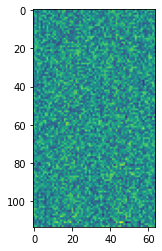

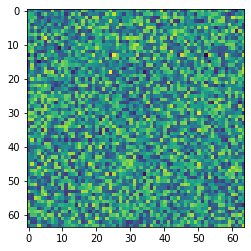

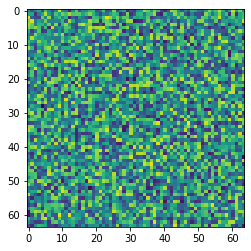

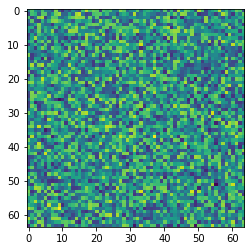

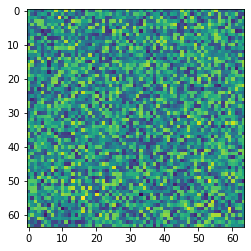

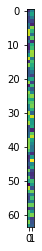

In [39]:
for l in model.layers:
    try:
        w = l.get_weights()[0]
    #print(w[0].shape)
        w_in = [abs(np.mean(w_i)) for w_i in w]

        x = np.linspace(0,len(w_in) , len(w_in))
    #plt.scatter(x,w_in)
        plt.imshow(w)
        plt.show()
    except:
        continue
#plt.show()